In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from regressors import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.decomposition import PCA
%matplotlib inline
bos=pd.read_csv('./boston/listings.csv')
sea=pd.read_csv('./seattle/listings.csv')
bos.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [2]:
bos_calendar = pd.read_csv('./boston/calendar.csv')
sea_calendar = pd.read_csv('./seattle/calendar.csv')
bos_calendar=bos_calendar.dropna(axis=0,subset=['price'])
sea_calendar=sea_calendar.dropna(axis=0,subset=['price'])
bos_calendar.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [3]:
#Need to first transfer Col Price from object into float64 for calculating.
bos_calendar.price=bos_calendar.price.replace('[\$,]', '', regex=True).astype(float)
sea_calendar.price=sea_calendar.price.replace('[\$,]', '', regex=True).astype(float)

#Calculate mean price group by date
bos_mean=bos_calendar.groupby('date'). mean().drop(columns=['listing_id'],axis=1).reset_index()
sea_mean=sea_calendar.groupby('date'). mean().drop(columns=['listing_id'],axis=1).reset_index()
bos_calendar.date.value_counts()

2016-12-04    2207
2016-12-03    2178
2016-12-02    2164
2016-12-01    2128
2016-11-30    2111
              ... 
2016-09-17     803
2016-09-14     795
2016-09-15     775
2016-09-16     769
2016-09-06     570
Name: date, Length: 365, dtype: int64

In [4]:
sea_calendar.date.value_counts()

2017-01-01    2922
2016-12-31    2859
2016-12-30    2840
2016-12-29    2835
2016-12-28    2833
              ... 
2016-01-09    1856
2016-01-06    1826
2016-01-08    1782
2016-01-07    1776
2016-01-04    1735
Name: date, Length: 365, dtype: int64

In [5]:
#Sort the mean price by decsending
sea_mean.sort_values(by=['price'],ascending=False)

,date,price
179,2016-07-01,157.480000
180,2016-07-02,157.080967
187,2016-07-09,156.448161
193,2016-07-15,156.365385
186,2016-07-08,156.260469
...,...,...
9,2016-01-13,118.680019
21,2016-01-25,118.232766
23,2016-01-27,118.148863
22,2016-01-26,117.737691


In [6]:
#Sort the mean price by decsending
bos_mean.sort_values(by=['price'],ascending=False) 

,date,price
10,2016-09-16,286.921977
11,2016-09-17,286.185554
9,2016-09-15,269.092903
4,2016-09-10,266.847280
3,2016-09-09,261.859327
...,...,...
189,2017-03-14,177.638713
183,2017-03-08,177.585394
182,2017-03-07,177.137435
148,2017-02-01,177.085445


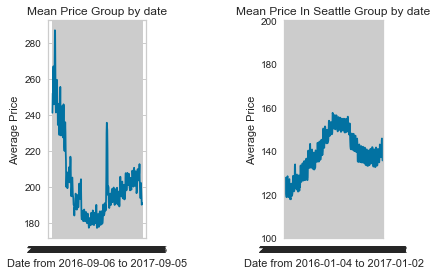

In [7]:
plt.subplot(1, 3, 1)
plt.plot(bos_mean.date,bos_mean.price);
plt.title("Mean Price Group by date")
plt.xlabel("Date from 2016-09-06 to 2017-09-05")
plt.ylabel("Average Price")
plt.subplot(1, 3, 3)
plt.plot(sea_mean.date,sea_mean.price);
plt.axis([0, 365, 100, 200])
plt.title("Mean Price In Seattle Group by date")
plt.xlabel("Date from 2016-01-04 to 2017-01-02")
plt.ylabel("Average Price")
plt.show()

In [8]:
#Here to check the strangely high point in the middle of the graph.
#Search for the reason online and got possible reason 'Boston Marathon'
bos_mean.iloc[215:230,].sort_values(by='price')

,date,price
216,2017-04-10,186.626728
217,2017-04-11,187.678035
215,2017-04-09,189.995410
229,2017-04-23,191.586744
218,2017-04-12,193.118124
226,2017-04-20,195.340230
225,2017-04-19,196.491594
228,2017-04-22,199.267775
227,2017-04-21,200.143347
219,2017-04-13,206.343750


In [87]:
bos.columns[bos.isnull().mean()>0.5]
# Drop columns with too many missing values
bos2=bos.drop(columns=bos.columns[bos.isnull().mean()>0.5])

In [88]:
category=bos2.select_dtypes(include='object')
col2=category
col=list(col2.columns)
for a in col:
    if col2[a].str.contains('$').sum()>100 :
        #Transfer columns with $ like price, into numeric variable
        try:
            col2[a]=col2[a].replace('[\$,]', '', regex=True).astype(float)
        except:
            continue
    elif col2[a].str.contains('%').sum()>100:
        #Transfer columns with % like price, into numeric variable
        try:
            col2[a]=col2[a].replace('[\%,]', '', regex=True).astype(float)
        except:
            continue
            
category=col2.select_dtypes(include='object')
col=list(category.columns)


<ipython-input-88-fa0e8fd05268>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col2[a]=col2[a].replace('[\$,]', '', regex=True).astype(float)


In [89]:
#Derive a numeric table with all the numeric variables in bos
bosnum=bos2.drop(columns=bos2.columns[bos2.dtypes==object])

#drop some numeric variables which have no useful information
bosnum=bosnum.drop(columns=['id','scrape_id', 'host_id','latitude', 'longitude'])

#Derive a numeric table with all the numeric variables in bos2
bosnum2=col2.drop(columns=col2.columns[col2.dtypes==object])

#combine the two numeric table
bosnum=pd.concat([bosnum, bosnum2], axis=1)

category=col2.select_dtypes(include='object')
col2=category
col=list(col2.columns)

for a in col:
    #Drop columns with too many kinds which means that column is not a category variable.
    #Drop columns with only 1 kind.
    #Drop columns with the largest group size > 3500 which mean one group domine the variable.
    if (category[a].value_counts().shape[0])>5 or (category[a].value_counts().shape[0]==1) or category[a].value_counts().max()>3500:
        col2=col2.drop(columns=[a])

        
col=list(bosnum.columns)
# Replace the missing value in numeric variables with mean.
for i in col:
    bosnum[i].fillna(value=bosnum[i].mean(),inplace=True)

In [90]:
col=list(col2.columns)
# Replace the missing value in category variables with mode.
for i in col:
    col2[i].fillna(value=col2[i].mode(),inplace=True)

In [42]:
for i in col:
    col2=pd.get_dummies(col2,columns=[i],dummy_na=True,drop_first=False)

In [14]:

col=list(bosnum.columns)
# Replace the missing value in numeric variables with mean.
for i in col:
    bosnum[i].fillna(value=bosnum[i].mean(),inplace=True)

bosnum=bosnum.drop(columns=['host_listings_count', 'host_total_listings_count'])
bosclean=pd.concat([col2, bosnum], axis=1)

In [15]:
bosnum[bosnum.price==3000].index[0]

3055

In [16]:
bosnum=bosnum.drop(axis=0,index=bosnum[bosnum.price==3000].index[0])
bosnum=bosnum.drop(axis=0,index=bosnum[bosnum.price==4000].index[0])
bosnum.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'price', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [17]:
Y=bosnum.price
X=bosnum.drop(columns=['price'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state=42) 
for i in range(X_train.shape[1]):
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    pval=stats.coef_pval(lm_model, X_train, y_train)
    max=np.sort(pval)[-1]
    if max > 0.05:
        index=list(pval).index(max)
        col=X_train.columns[index-1]
        X_train=X_train.drop(columns=[col])
        X_test=X_test.drop(columns=[col])
    else:
        break

In [19]:

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(lm_model, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(lm_model, X_train, y_train, X_train.columns)

coef_pval:
 [6.89226454e-13 0.00000000e+00 6.53476786e-06 9.74471392e-10
 1.07810253e-03 2.07123509e-02 4.91993628e-03 6.88338275e-15
 3.27726945e-02 0.00000000e+00 6.52803197e-05 1.85976625e-04
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
       Min       1Q   Median       3Q      Max
-1260.4001 -37.7575  15.6511  52.7257  351.747


Coefficients:
                             Estimate  Std. Error  t value   p value
_intercept                -209.350796   28.998476  -7.2194  0.000000
accommodates                21.434479    1.407183  15.2322  0.000000
bathrooms                   19.071356    4.221279   4.5179  0.000007
bedrooms                    23.154868    3.772989   6.1370  0.000000
availability_60              1.024335    0.312953   3.2731  0.001078
availability_90             -0.419972    0.181441  -2.3147  0.020712
availability_365            -0.036847    0.013091  -2.8147  0.004920
review_scores_rating         0.900268    0.114927   7.8334  0.000000
review_scores

In [20]:
#clf = linear_model.Lasso(alpha=1)
#lm_model=clf.fit(X_train, y_train) #Fit
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train) 

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

test_score

0.3270451736546145

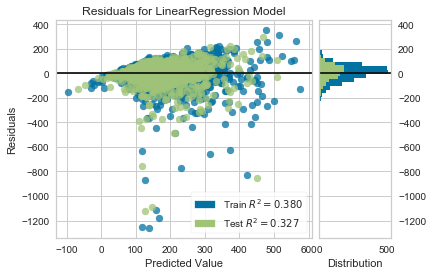

In [21]:
visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [23]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
8,review_scores_location,23.655803,23.655803
2,bedrooms,23.154868,23.154868
0,accommodates,21.434479,21.434479
1,bathrooms,19.071356,19.071356
9,review_scores_value,-14.659549,14.659549
7,review_scores_cleanliness,6.546710,6.546710
10,reviews_per_month,-4.108636,4.108636
3,availability_60,1.024335,1.024335
6,review_scores_rating,0.900268,0.900268
11,cleaning_fee,0.589344,0.589344


In [143]:
boscate=pd.concat([bosnum2.price, col2], axis=1)

In [144]:
#calculate average price by different category
col2cat=list(col2.columns)
res=boscate.groupby(boscate.host_response_time).mean().reset_index()
res=res.rename(columns={list(res.columns)[0]:"category"})

In [145]:
#replace all the f and t by their own category feature name
for i in col2cat[1:]:
    boscate[i]=boscate[i].replace("f",i+":F")
    boscate[i]=boscate[i].replace("t",i+":T")
    res1=boscate.groupby(i).mean().reset_index()
    res1=res1.rename(columns={list(res1.columns)[0]:"category"})
    res=pd.concat([res, res1])

In [152]:
#sort the result
res.sort_values(by='price',ascending=False)

,category,price
3,super_strict_30,324.141176
1,require_guest_phone_verification:T,249.139241
0,Entire home/apt,227.436765
2,within a few hours,190.050082
2,strict,188.219975
1,is_location_exact:T,177.912662
0,instant_bookable:F,177.716817
4,Real Bed,177.203301
1,host_is_superhost:T,176.434889
1,host_identity_verified:T,174.113331
